### 多元线性回归
$ f_{\vec{w},b}(\vec{x}) = \vec{w} \vec{x} + b $

### 成本函数

$ J_{(\vec{w},b)} $

### 梯度下降

$ w_j = w_j - \alpha \frac{\partial}{\partial w_j} J_{(\vec{w}, b)} $

b = b - $\alpha \frac{\partial}{\partial b} J_{(\vec{w}, b)} $

### 其他

#### 特征缩放
- 除以最大值   0~1
- 均值 $ \frac{x-\mu}{max-min} $ -1~1
- z值归一化----减去均值再除以标准差  $ \frac{x-\mu}{\sigma} $ -3~3

#### 检查梯度下降是否收敛
绘制成本函数，下降，并趋于固定值

#### 选择合适的学习率
0.001 -> 0.003 -> 0.01 -> 0.03 -> 0.1 ... -> 1

#### 特征工程
对原始数据中特征进行处理的方法统称
如原变量组合成新变量，如 x3 = x1 * x2

#### 多项式回归
包含变量为多元多次的式子 $ f = a_1x + a_1x^2 + a_3x^3 + ... $

选择合适的函数拟合

## pyhton实现

In [147]:
import numpy as np
import pandas as pd
import copy
import math
from matplotlib import pyplot as plt

In [148]:
# 特征缩放
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray): Shape (m,n) input data, m examples, n features
      
    Returns:
      X_norm (ndarray): Shape (m,n)  input normalized by column
      mu (ndarray):     Shape (n,)   mean of each feature
      sigma (ndarray):  Shape (n,)   standard deviation of each feature
    """
    # 计算特征均值
    mu = np.mean(X, axis=0)                 # mu will have shape (n,)
    # 计算特征标准差
    sigma = np.std(X, axis=0)                  # sigma will have shape (n,)
    # x值归一化为z值
    X_norm = (X - mu) / sigma      
 
    return (X_norm, mu, sigma)

In [149]:
# 成本函数
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
 
    return total_cost

In [150]:
# 梯度函数
def compute_gradient(x, y, w, b):    
    m = x.shape[1]
    dj_dw = np.zeros(m)
    dj_db = 0
    for i in range(m):
        f_wb_i = np.dot(w,x[i]) + b

        dj_db_i = f_wb_i - y[i]
        dj_dw_i = (f_wb_i - y[i]) * x[i]

        dj_db = dj_db + dj_db_i
        dj_dw = dj_dw + dj_dw_i

    dj_db = (1 / m) * dj_db
    dj_dw = (1 / m) * dj_dw

    return dj_dw, dj_db

In [151]:
# 梯度下降函数
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    函数用于求解最优回归模型参数w,b.  
    
    参数:
      x (ndarray (m,))  : 输入数据 
      y (ndarray (m,))  : 目标值
      w_in,b_in (scalar): 模型初始参数值  
      alpha (float):     学习率
      num_iters (int):   总迭代步数
      cost_function:     成本函数
      gradient_function: 梯度函数
      
    返回:
      w (scalar): 参数w计算结果
      b (scalar): 参数b计算结果
      J_history (List): 计算过程中的成本历史值
      p_history (list): 计算过程中的w,b历史值 
      """
    
    w = copy.deepcopy(w_in) # 深拷贝以避免修改全局w_in
    b = copy.deepcopy(b_in) # 深拷贝以避免修改全局w_in
    # 采用列表储存每一步迭代的成本值、w值、b值
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # 计算梯度并更新梯度值
        dj_dw, dj_db = gradient_function(x, y, w , b)     
 
        # 梯度下降更新参数值
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
 
        # 每一步迭代中保存成本值
        if i<100000:      # 停止迭代的条件 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # 每迭代10次打印一次成本
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [152]:
# 获取数据
data = pd.read_csv('data.csv')
data = data.to_numpy(dtype=int)

x_train = data[:, :2]
y_train = data[:, -1]

# 数据缩放
x_norm,_,_ = zscore_normalize_features(x_train)
y_norm,_,_ = zscore_normalize_features(y_train)

In [153]:
# 参数初始化
m = x_norm.shape[1]
w_init = np.zeros(m, dtype=int)
b_init = 0
# 设置迭代步数和学习率
iterations = 3000
tmp_alpha = 1.0e-2
# 执行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_norm ,y_norm, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final:8.4f})")

Iteration    0: Cost 4.99e-01  dj_dw: [-0.07907272  0.01893949], dj_db: -8.283e-02   w: [ 0.00079073 -0.00018939], b: 8.28264e-04
Iteration  300: Cost 3.80e-01  dj_dw: [-0.03684077  0.00077376], dj_db: -3.384e-03   w: [ 0.16638625 -0.01719976], b: 7.52182e-02
Iteration  600: Cost 3.30e-01  dj_dw: [-1.72033251e-02  2.35524087e-05], dj_db: -1.030e-04   w: [ 0.24364816 -0.01787202], b: 7.81582e-02
Iteration  900: Cost 3.08e-01  dj_dw: [-8.03496974e-03 -3.13903277e-06], dj_db:  1.373e-05   w: [ 0.2797313  -0.01788164], b: 7.82002e-02
Iteration 1200: Cost 2.98e-01  dj_dw: [-3.75287406e-03 -2.05792062e-06], dj_db:  9.000e-06   w: [ 0.29658445 -0.01787339], b: 7.81641e-02
Iteration 1500: Cost 2.94e-01  dj_dw: [-1.75284874e-03 -9.85957101e-07], dj_db:  4.312e-06   w: [ 0.30445602 -0.017869  ], b: 7.81450e-02
Iteration 1800: Cost 2.92e-01  dj_dw: [-8.18700314e-04 -4.61546016e-07], dj_db:  2.018e-06   w: [ 0.30813259 -0.01786693], b: 7.81359e-02
Iteration 2100: Cost 2.91e-01  dj_dw: [-3.82389077

## 绘图

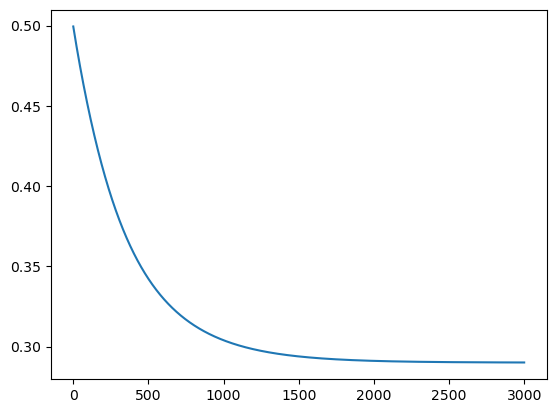

In [154]:
# 检查梯度下降是否收敛
plt.plot(J_hist)